###  非線性回歸 (2次回歸)

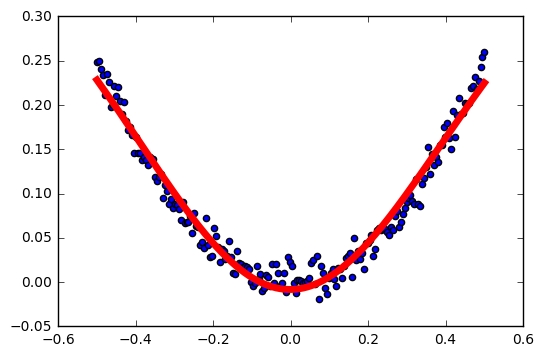

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#使用 numpy 來產生200個樣本點
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis] #column
noise = np.random.normal(0, 0.01, x_data.shape)
y_data = np.square(x_data) + noise

#定義兩個placeholder，目的在於 train時候透過 feed 傳入 x_data 與 y_data
x = tf.placeholder(tf.float32, [None, 1]) #維度為 ?*1
y = tf.placeholder(tf.float32, [None, 1])

#定義神經網路的結構

#定義中間層，總共10個神經元
Weights_L1 = tf.Variable(tf.random_normal([1, 10])) #定義權值變數，並且初始化為 normal 1*10
Biases_L1 = tf.Variable(tf.zeros([1,10])) #定義bias變數，並且初始化為0矩陣
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + Biases_L1  # Weights_L1*x + Biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1) #中間層的輸出 (激活函數為 雙曲正切函數)

#定義輸出層，總共1個神經元
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
Biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + Biases_L2  # Weights_L2*L1 + Biases_L2 (輸出層的輸入，是中間層的輸出L1)
prediction = tf.nn.tanh(Wx_plus_b_L2)

#代價函數 : loss = mean((y - prediction)^2)
loss = tf.reduce_mean(tf.square(y_data - prediction))

#Gradient desent method  (learning rate = 0.1)
gd = tf.train.GradientDescentOptimizer(0.1)

#最小化 代價函數 (operator)
train = gd.minimize(loss)

#初始化變數 operator
init = tf.global_variables_initializer()

#開始training
with tf.Session() as sess:
    sess.run(init) #變數初始化
    feed_dict = {x : x_data, y : y_data} #訓練時 要傳入的 feed 的字典
    for _ in range(2000):
        sess.run(train, feed_dict)   
    #獲得預測值
    feed_pre_dict = {x : x_data} #觀察預測值時 要傳入的 feed 的字典
    pv = sess.run(prediction, feed_pre_dict) #預測值
    
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, pv, 'r-', lw=5)
    plt.show()

### 手寫數字識別 (簡單版本)


In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

#載入數據集
mnist = input_data.read_data_sets("MNIST_data", one_hot = True) #這步有時候會失效

#因為數據集很大，故我們要用stochastic gradient descent，會將資料集分批次，並不會一次將所有資料拿來train (計算量很大)
#每一個批次的大小
batch_size = 100 

#計算一共有多少批次
n_batch = mnist.train.num_examples // batch_size  # // 在python中表示取商

#定義兩個placeholder，目的在於 train時候透過 feed 傳入 x_data 與 y_data
x = tf.placeholder(tf.float32, [None, 784]) # 28 * 28 = 784
y = tf.placeholder(tf.float32, [None, 10]) #輸出層，有十個神經元，每個神經元有一個激活值，十個激活值排成一個 1*10的向量

#建立一個簡單的神經網路 (只有輸出層，總共10個神經元)
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([1, 10]))
prediction = tf.nn.softmax(tf.matmul(x, W) + b)

#代價函數 : loss = mean((y - prediction)^2)
loss = tf.reduce_mean(tf.square(y - prediction))

#Gradient desent method  (learning rate = 0.2)
gd = tf.train.GradientDescentOptimizer(0.2)

#最小化 代價函數 (operator)
train = gd.minimize(loss)

#初始化變數 operator
init = tf.global_variables_initializer()

#如果y標籤最大的值，與prediction標籤最大的值相等，則回傳true
#結果存在一個 boolean 的變數中
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1)) #argmax 回傳一維張量中最大的值，所在的位置

#求準確率
#轉換資料型態 boolean 轉成 float，接著在取平均值，得到準確率
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

#開始training
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21): #總共疊代21次 (outer loop)
        #每一次 outer loop 不一次拿所有的數據集，來做 Gradient desent，這就是 stochastic gradient descent
        for batch in range(n_batch): #每一個 outer loop 疊代 n_batch 個批次
            #利用 train.next_batch 函數，讀取一個batch的 x, y 存給 batch_xs, batch_ys
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {x: batch_xs, y: batch_ys}  #拿來feed 的 dictionary
            sess.run(train, feed_dict)
        #每做完一次 outer loop 計算一次準確率
        outer_loop_feed_dict = {x: mnist.test.images, y: mnist.test.labels} #testing data feed dictionary
        acc = sess.run(accuracy, outer_loop_feed_dict)
        print("Iter =" + str(epoch) + ", Testing Accuracy =" + str(acc))

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Iter =0, Testing Accuracy =0.8331
Iter =1, Testing Accuracy =0.8699
Iter =2, Testing Accuracy =0.8821
Iter =3, Testing Accuracy =0.8887
Iter =4, Testing Accuracy =0.8935
Iter =5, Testing Accuracy =0.8964
Iter =6, Testing Accuracy =0.899
Iter =7, Testing Accuracy =0.9017
Iter =8, Testing Accuracy =0.9037
Iter =9, Testing Accuracy =0.9054
Iter =10, Testing Accuracy =0.9064
Iter =11, Testing Accuracy =0.9079
Iter =12, Testing Accuracy =0.909
Iter =13, Testing Accuracy =0.9092
Iter =14, Testing Accuracy =0.9098
Iter =15, Testing Accuracy =0.9109
Iter =16, Testing Accuracy =0.9118
Iter =17, Testing Accuracy =0.912
Iter =18, Testing Accuracy =0.9127
Iter =19, Testing Accuracy =0.9133
Iter =20, Testing Accuracy =0.9142


### 作業
對手寫數字識別(簡單版本)優化，使其準確率提升到 95%  
限制: 不可用CNN

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

#載入數據集
mnist = input_data.read_data_sets("MNIST_data", one_hot = True) 

#每一個批次的大小
batch_size = 100 

#計算一共有多少批次
n_batch = mnist.train.num_examples // batch_size 

#定義兩個placeholder，目的在於 train時候透過 feed 傳入 x_data 與 y_data
x = tf.placeholder(tf.float32, [None, 784]) 
y = tf.placeholder(tf.float32, [None, 10]) 


#建立一個神經網路
#隱藏層
W1 = tf.Variable(tf.truncated_normal([784, 500], stddev=0.1))
b1 = tf.Variable(tf.zeros([500]) + 0.1)
L1 = tf.nn.tanh(tf.matmul(x, W1) + b1) #隱藏層的輸出


#輸出層
W2 = tf.Variable(tf.zeros([500, 10]))
b2 = tf.Variable(tf.zeros([10]) + 0.1)
prediction = tf.nn.tanh(tf.matmul(L1, W2) + b2)

#代價函數 :
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = prediction))

#Gradient desent method 
gd = tf.train.GradientDescentOptimizer(0.2)

#最小化 代價函數 (operator)
train = gd.minimize(loss)

#初始化變數 operator
init = tf.global_variables_initializer()


#結果存在一個 boolean 的變數中
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1)) #argmax 回傳一維張量中最大的值，所在的位置

#求準確率
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

#開始training
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(20): 
       
        for batch in range(n_batch): #每一個 outer loop 疊代 n_batch 個批次

            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {x: batch_xs, y: batch_ys} 
            sess.run(train, feed_dict)
        #計算一次準確率
        outer_loop_feed_dict = {x: mnist.test.images, y: mnist.test.labels} #testing data feed dictionary
        acc = sess.run(accuracy, outer_loop_feed_dict)
        print("Iter =" + str(epoch) + ", Testing Accuracy =" + str(acc))

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Iter =0, Testing Accuracy =0.9133
Iter =1, Testing Accuracy =0.9268
Iter =2, Testing Accuracy =0.9334
Iter =3, Testing Accuracy =0.9415
Iter =4, Testing Accuracy =0.9468
Iter =5, Testing Accuracy =0.9514
Iter =6, Testing Accuracy =0.9558
Iter =7, Testing Accuracy =0.9574
Iter =8, Testing Accuracy =0.96
Iter =9, Testing Accuracy =0.9619
Iter =10, Testing Accuracy =0.9648
Iter =11, Testing Accuracy =0.9649
Iter =12, Testing Accuracy =0.9669
Iter =13, Testing Accuracy =0.9677
Iter =14, Testing Accuracy =0.9692
Iter =15, Testing Accuracy =0.9705
Iter =16, Testing Accuracy =0.9695
Iter =17, Testing Accuracy =0.9703
Iter =18, Testing Accuracy =0.9725
Iter =19, Testing Accuracy =0.9737
